In [ ]:
import numpy as np
import seaborn as sns
import sympy as smp
import matplotlib.pyplot as plt


y = (tan θ)x – gx2/2(v0cosθ)2

#Projectile Motion using N-R

In [ ]:
def NR_projectile(vel,range,tol,n_max):
  Rmax=(vel*vel)/9.81
  if Rmax < range:
    print("Incorrect value of range. ")
    return 0
  else:
    def NR(theta):  
      import sympy as smp
      x,v,th=smp.symbols('x v th',real='True')
      y=((x*smp.tan(th))-((4.905)*((x**2)/((v**2)*(smp.cos(th)**2)))))
      y_calc=smp.lambdify([x,v,th],y)
      y_diff=smp.diff(y,th)
      y_diff_calc=smp.lambdify([x,v,th],y_diff)
      return y_calc(range,vel,theta)/y_diff_calc(range,vel,theta)
    iter=1
    theta=np.pi/12
    
    while iter<n_max:
      theta1= theta -NR(theta)

      if abs(theta1-theta)<tol:
        break
      else:
        theta=theta1
  print(theta1*180/np.pi,iter)
  rng=lambda m,x: (x*np.tan(m))-4.905*(x/(vel*np.cos(m)))**2
  x=np.linspace(0,range,1000)
  y=rng(theta1,x)
  plt.plot(x,y)

25.85109224525052 1


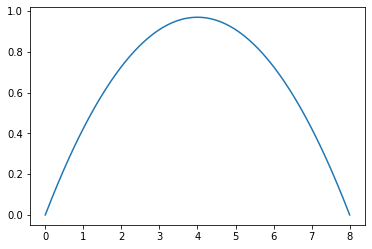

In [ ]:
NR_projectile(10,8,0.00001,20)

#Chain problem using N-R

In [ ]:
def NR_chain(L1,x11,x22,y11,y22,tol,n_max):
    
  def Newton_R(m):  
    x1,x2,y1,y2,L,a=smp.symbols('x1 x2 y1 y2 L a',real='True')
    f=(2*a*smp.sinh((x2-x1)/(2*a))-smp.sqrt((L**2)-((y2-y1)**2)))
    #print(f)
    f_calc=smp.lambdify([x1,y1,x2,y2,L,a],f)
    f_diff=smp.diff(f,a)
    #print(f_diff)
    #print(f_diff)
    f_diff_calc=smp.lambdify([x1,y1,x2,y2,L,a],f_diff)
    return f_calc(x11,y11,x22,y22,L1,m)/f_diff_calc(x11,y11,x22,y22,L1,m)
  iter=1
  m=1
  while iter<n_max:
    m1=m-Newton_R(m)
    if abs(m-m1)<tol:
      break
    else:
      m=m1
  print(m1,iter)


In [ ]:
def NR_chain(L1,x11,x22,y11,y22,tol,n_max):  
  def Newton_R(m):  
    x1,x2,y1,y2,L,a=smp.symbols('x1 x2 y1 y2 L a',real='True')
    f=(2*a*smp.sinh((x2-x1)/(2*a))-smp.sqrt((L**2)-((y2-y1)**2)))
    #print(f)
    f_calc=smp.lambdify([x1,y1,x2,y2,L,a],f)
    f_diff=smp.diff(f,a)
    #print(f_diff)
    f_diff_calc=smp.lambdify([x1,y1,x2,y2,L,a],f_diff)
    return f_calc(x11,y11,x22,y22,L1,m)/f_diff_calc(x11,y11,x22,y22,L1,m)
  iter=1
  m=1
  while iter<n_max:
    m1=m-Newton_R(m)
    if abs(m-m1)<tol:
      break
    else:
      iter=iter+1
      m=m1
  print("The root of the chain problem is",m1,"and the number of iterations is" ,iter)
  x0=(x11+x22)/2 + (m1/2)*np.log((L1-y22+y11)/(L1+y22-y11))
  y0=y11-m1*(np.cosh((x11-x0)/m1)-1)
  chain=lambda m1,x:(y0+m1*(np.cosh((x-x0)/m1)-1))
  x=np.linspace(x11,x22,1000)
  y=chain(m1,x)
  plt.plot(x,y)
  plt.title("Hanging Chain")

The root of the chain problem is 1.148201075388058 and the number of iterations is 5


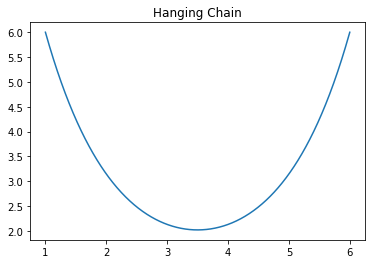

In [ ]:
NR_chain(10,1,6,6,6,0.00000001,30)